In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\nspeelman.SEIU\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\nspeelman.SEIU\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
def load_scores_from_json(json_path):
    """
    Load contrastive score data from a JSON file into a Pandas DataFrame.

    Parameters:
        json_path (str): Path to the checkpoint JSON file.

    Returns:
        pd.DataFrame: A DataFrame with columns ['Word', 'frequency', theme-pair scores...]
    """
    with open(json_path, "r") as f:
        raw_data = json.load(f)

    # Convert the nested dictionary into a flat table
    df = pd.DataFrame.from_dict(raw_data, orient="index")
    df.index.name = "Word"
    df.reset_index(inplace=True)

    return df

In [3]:
json_path = 'checkpoint_contrastive_scores.json'

df = load_scores_from_json(json_path)

df.head()

,Word,frequency,reflection-violence,reflection-horror,reflection-sexuality,reflection-cruelty,reflection-addiction,reflection-corruption,reflection-despair,reflection-noise,...,belonging-violence,belonging-horror,belonging-sexuality,belonging-cruelty,belonging-addiction,belonging-corruption,belonging-despair,belonging-noise,belonging-filth,belonging-dehumanization
0,like,0.00257,0.009856,0.020631,0.014615,0.017272,0.016999,0.026926,0.011653,0.016829,...,0.023913,0.034688,0.028673,0.031329,0.031056,0.040984,0.025710,0.030886,0.034105,0.025116
1,time,0.00195,0.006816,0.015767,0.019398,0.030484,0.017925,0.025739,0.008681,0.023650,...,0.008375,0.017327,0.020958,0.032043,0.019484,0.027298,0.010240,0.025209,0.019968,-0.000391
2,would,0.00186,-0.005095,0.015059,0.016368,0.017068,0.010625,0.014614,0.001522,0.013835,...,-0.005172,0.014983,0.016291,0.016991,0.010548,0.014537,0.001445,0.013758,0.015296,0.002529
3,people,0.00178,0.001843,0.004110,0.003896,0.023169,0.013910,0.025644,0.005914,0.019303,...,0.014319,0.016586,0.016372,0.035644,0.026386,0.038120,0.018390,0.031779,0.025693,-0.003909
4,also,0.00155,0.015412,0.019822,0.019270,0.027398,0.014801,0.028150,0.001839,0.017739,...,0.015858,0.020267,0.019715,0.027844,0.015247,0.028595,0.002284,0.018185,0.020482,0.011928


In [4]:
def add_median_score_column(df):
    """
    Adds a 'median_score' column to the DataFrame by computing the median
    of all contrastive score columns for each row.

    Returns:
        pd.DataFrame: The updated DataFrame with a new 'median_score' column.
    """
    # Identify score columns (exclude 'Word' and 'frequency')
    score_columns = df.columns.difference(['Word', 'frequency'])

    # Calculate median across those columns
    df["median_score"] = df[score_columns].median(axis=1, numeric_only=True)
    return df

In [5]:
df_medians = add_median_score_column(df)

df_medians = df_medians.sort_values("median_score", ascending=False)

colz = ['Word', 'frequency','median_score']

df_medians = df_medians[colz]

df_medians


,Word,frequency,median_score
10974,embrace,0.000015,0.021963
12484,abiding,0.000003,0.020516
7082,serene,0.000002,0.019113
12944,uniting,0.000002,0.019058
542,peace,0.000105,0.018867
...,...,...,...
4892,rapist,0.000004,-0.024708
12464,immoral,0.000003,-0.024866
3685,whore,0.000007,-0.024907
12469,obscene,0.000003,-0.025521


In [6]:
def plot_score_histogram(df, column_name):
    """
    Plots a histogram of values in the given column from 0 to 1 using 0.001-wide bins.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        column_name (str): Name of the column to plot.
    """
    values = df[column_name].dropna()

    # Create bins from 0.000 to 1.000 at 0.001 intervals
    bins = np.arange(-.03, .03, 0.0001)

    plt.figure(figsize=(12, 6))
    plt.hist(values, bins=bins, edgecolor='black', alpha=0.8)

    plt.title(f"Histogram of {column_name} (0.001-resolution bins)")
    plt.xlabel(column_name)
    plt.ylabel("Word count")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

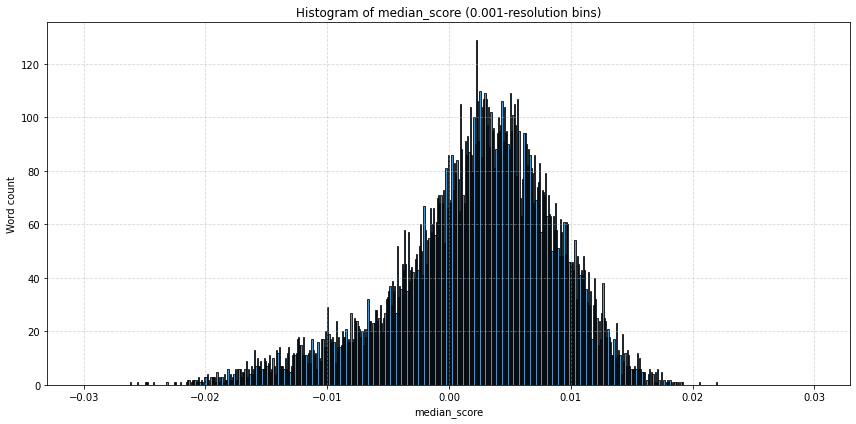

In [7]:
plot_score_histogram(df, 'median_score')

In [8]:
df_medians['median_score'].describe()

count    14124.000000
mean         0.002168
std          0.006686
min         -0.026130
25%         -0.001385
50%          0.002925
75%          0.006702
max          0.021963
Name: median_score, dtype: float64

In [9]:
cut_off = .004

df_medians_filtered = df_medians[df_medians['median_score'] >= cut_off]

df_medians_filtered

,Word,frequency,median_score
10974,embrace,0.000015,0.021963
12484,abiding,0.000003,0.020516
7082,serene,0.000002,0.019113
12944,uniting,0.000002,0.019058
542,peace,0.000105,0.018867
...,...,...,...
8299,rouse,0.000001,0.004004
1941,stats,0.000021,0.004002
3272,reagan,0.000009,0.004002
3923,lyon,0.000006,0.004002


In [10]:
def add_index_column(df, score_col="median_score", freq_col="frequency", index_col="index"):
    """
    Adds an index column as the product of score_col and freq_col.

    Parameters:
        df (pd.DataFrame): Your DataFrame
        score_col (str): Name of the score column
        freq_col (str): Name of the frequency column
        index_col (str): Name of the output column
    """
    df[index_col] = df[score_col] * df[freq_col]
    return df

df_indexed = add_index_column(df_medians_filtered)

df_indexed = df_indexed.sort_values("index",ascending=False)

df_indexed

C:\Users\nspeelman.SEIU\AppData\Local\Temp\ipykernel_74352\2783843462.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[index_col] = df[score_col] * df[freq_col]


,Word,frequency,median_score,index
9150,one,0.002950,0.009951,2.935619e-05
1,time,0.001950,0.011763,2.293803e-05
0,like,0.002570,0.008567,2.201694e-05
3,people,0.001780,0.009432,1.678940e-05
9151,get,0.001910,0.008107,1.548437e-05
...,...,...,...,...
8966,stylus,0.000001,0.004105,4.310666e-09
8937,longs,0.000001,0.004076,4.279349e-09
10134,mew,0.000001,0.004214,4.214311e-09
9096,gusto,0.000001,0.004066,4.066441e-09


In [11]:
def normalize_column(df, source_col="index", target_col="normalized_index"):
    """
    Adds a normalized version of the given column to the DataFrame using min-max scaling.

    Parameters:
        df (pd.DataFrame): The input DataFrame
        source_col (str): Column to normalize
        target_col (str): New column to store normalized values
    """
    min_val = df[source_col].min()
    max_val = df[source_col].max()
    df[target_col] = (df[source_col] - min_val) / (max_val - min_val)
    return df

df_normalized = normalize_column(df_indexed)

df_normalized

,Word,frequency,median_score,index,normalized_index
9150,one,0.002950,0.009951,2.935619e-05,1.000000
1,time,0.001950,0.011763,2.293803e-05,0.781340
0,like,0.002570,0.008567,2.201694e-05,0.749959
3,people,0.001780,0.009432,1.678940e-05,0.571862
9151,get,0.001910,0.008107,1.548437e-05,0.527401
...,...,...,...,...,...
8966,stylus,0.000001,0.004105,4.310666e-09,0.000010
8937,longs,0.000001,0.004076,4.279349e-09,0.000009
10134,mew,0.000001,0.004214,4.214311e-09,0.000007
9096,gusto,0.000001,0.004066,4.066441e-09,0.000002


In [13]:
def export_wordlist_js(df, word_col="Word", weight_col="normalized_index", output_path="../js/wordlist.js"):
    """
    Exports a JS file that defines a meditativeWords array with:
    { word: "string", index: number }

    Parameters:
        df (pd.DataFrame): DataFrame containing words and normalized scores
        word_col (str): Column with the word strings
        weight_col (str): Column with the normalized index values (0–1)
        output_path (str): Path to output JS file
    """
    # Keep only relevant columns, drop missing values
    wordlist = df[[word_col, weight_col]].dropna()
    wordlist = wordlist.rename(columns={word_col: "word", weight_col: "index"})

    # Format entries as JS objects
    js_array = ",\n  ".join(
        f'{{ word: "{row.word}", index: {round(row.index, 6)} }}'
        for row in wordlist.itertuples(index=False)
    )

    js_code = f"export const meditativeWords = [\n  {js_array}\n];\n"

    # Write to file
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(js_code)

    print(f"✅ wordlist.js written to {output_path}")

# Example usage:
# df = pd.read_csv("my_final_word_list.csv")
# export_wordlist_js(df)

export_wordlist_js(df_normalized)

✅ wordlist.js written to ../js/wordlist.js
